In [ ]:
import yfinance as yf

# 비트코인 가격 데이터 다운로드 (5년치 데이터)
btc = yf.download('BTC-USD', period='5y', interval='1d')

# 데이터 확인
print(btc.tail())

[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2025-03-05  90623.562500  90998.242188  86379.773438  87222.953125   
2025-03-06  89961.726562  92804.937500  87852.140625  90622.359375   
2025-03-07  86742.671875  91191.046875  84717.679688  89963.281250   
2025-03-08  86154.593750  86847.265625  85247.484375  86742.656250   
2025-03-10  81673.617188  81804.414062  80126.015625  80767.000000   

Price            Volume  
Ticker          BTC-USD  
Date                     
2025-03-05  50498988027  
2025-03-06  47749810486  
2025-03-07  65945677657  
2025-03-08  18206118081  
2025-03-10  35042439168  


In [25]:
# 멀티인덱스에서 'Ticker' 레벨을 드롭하고, 컬럼명을 설정
btc.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# 'Date', 'Open', 'High', 'Low', 'Close', 'Volume' 순서로 컬럼 재정렬
btc = btc[['Open', 'High', 'Low', 'Close', 'Volume']]

In [26]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-06,9078.308594,9167.695312,9032.079102,9122.545898,40826885651
2020-03-07,9121.600586,9163.220703,8890.744141,8909.954102,36216930370
2020-03-08,8908.206055,8914.343750,8105.252930,8108.116211,39973102121
2020-03-09,8111.146484,8177.793457,7690.098145,7923.644531,46936995808
2020-03-10,7922.146973,8136.945312,7814.763184,7909.729492,42213940994
...,...,...,...,...,...
2025-03-01,84373.867188,86522.304688,83794.234375,86031.914062,29190628396
2025-03-02,86036.257812,95043.437500,85040.210938,94248.351562,58398341092
2025-03-03,94248.421875,94429.750000,85081.304688,86065.671875,70072228536


### SMA
추세 파악: SMA는 가격의 움직임을 부드럽게 만들어 주기 때문에 가격이 올라가는 추세인지, 내려가는 추세인지 쉽게 파악할 수 있습니다.

가격이 14일 SMA 위에 있으면 상승 추세로 볼 수 있고, 가격이 14일 SMA 아래에 있으면 하락 추세로 볼 수 있습니다.

골든 크로스 (Golden Cross): 단기 SMA(예: 50일 SMA)가 장기 SMA(예: 200일 SMA)를 위로 돌파하면 매수 신호로 해석할 수 있습니다.

데드 크로스 (Death Cross): 단기 SMA가 장기 SMA를 아래로 돌파하면 매도 신호로 해석할 수 있습니다.

In [27]:
import talib as ta

# 예시: 'Close'가 비트코인 종가 데이터
sma_14 = ta.SMA(btc['Close'], timeperiod=14)    # 14일 SMA
sma_50 = ta.SMA(btc['Close'], timeperiod=50)    # 50일 SMA
sma_200 = ta.SMA(btc['Close'], timeperiod=200)  # 200일 SMA
print(sma_14.tail())
print(sma_50.tail())
print(sma_200.tail())

Date
2025-03-01    92217.517857
2025-03-02    92079.897879
2025-03-03    91386.489955
2025-03-04    90792.393415
2025-03-05    90362.961496
dtype: float64
Date
2025-03-01    97735.100156
2025-03-02    97728.735312
2025-03-03    97560.280000
2025-03-04    97414.393437
2025-03-05    97296.183750
dtype: float64
Date
2025-03-01    82123.290020
2025-03-02    82300.845430
2025-03-03    82443.373301
2025-03-04    82585.013750
2025-03-05    82740.736699
dtype: float64


In [28]:
import plotly.graph_objects as go

# 그래프 생성
fig = go.Figure()

# 종가(Close) 시계열 추가
fig.add_trace(go.Scatter(x=btc.index, y=btc['Close'], mode='lines', name='Close', line=dict(color='blue')))

# 14일 SMA 시계열 추가
fig.add_trace(go.Scatter(x=btc.index, y=sma_14, mode='lines', name='SMA 14', line=dict(color='green')))

# 50일 SMA 시계열 추가
fig.add_trace(go.Scatter(x=btc.index, y=sma_50, mode='lines', name='SMA 50', line=dict(color='orange')))

# 200일 SMA 시계열 추가
fig.add_trace(go.Scatter(x=btc.index, y=sma_200, mode='lines', name='SMA 200', line=dict(color='red')))

# 레이아웃 설정
fig.update_layout(
    title='Bitcoin Price with SMA Indicators',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_dark'
)

# 그래프 표시
fig.show()

# 그래프를 이미지로 저장
fig.write_image("resources/bitcoin_price_with_sma_indicators.png", width=800, height=400, scale=2)

### RSI

RSI 값은 0에서 100 사이의 값을 가집니다.

일반적으로 RSI 값이 70 이상이면 해당 자산이 과매수 상태에 있다고 판단하고, 이는 가격이 지나치게 상승하여 조정이 있을 수 있음을 의미합니다.

RSI 값이 30 이하이면 해당 자산이 과매도 상태에 있다고 판단하고, 이는 가격이 지나치게 하락했음을 의미하며 반등 가능성을 암시할 수 있습니다.

RSI 값이 50 근처이면 중립적이며, 가격이 특별히 강세나 약세를 보이지 않는 상태입니다.

In [29]:
rsi = ta.RSI(btc['Close'], timeperiod=14)  # 14일 RSI
print(rsi.tail())

Date
2025-03-01    31.176986
2025-03-02    51.145193
2025-03-03    39.007201
2025-03-04    41.133639
2025-03-05    46.987426
dtype: float64


In [30]:
# 그래프 생성
fig = go.Figure()

# RSI 시계열 추가
fig.add_trace(go.Scatter(x=btc.index, y=rsi, mode='lines', name='RSI', line=dict(color='purple')))

# 과매도(30)와 과매수(70) 기준선 추가
fig.add_trace(go.Scatter(x=btc.index, y=[30] * len(btc.index), mode='lines', name='Oversold (30)', line=dict(color='red', dash='solid')))
fig.add_trace(go.Scatter(x=btc.index, y=[70] * len(btc.index), mode='lines', name='Overbought (70)', line=dict(color='green', dash='solid')))

# 레이아웃 설정
fig.update_layout(
    title='Bitcoin RSI (14) with Overbought and Oversold Levels',
    xaxis_title='Date',
    yaxis_title='RSI',
    template='plotly_dark',
    yaxis=dict(range=[0, 100])  # RSI는 0에서 100 사이로 제한
)

# 그래프 표시
fig.show()

# 그래프를 이미지로 저장
fig.write_image("resources/bitcoin_rsi14_with_overbought_and_oversold_levels.png", width=800, height=400, scale=2)

### MACD의 구성 요소

MACD 라인 (MACD Line):

- 단기 지수 이동 평균 (EMA)와 장기 지수 이동 평균 (EMA)의 차이를 나타냅니다. 보통 12일 EMA와 26일 EMA를 사용합니다.

- MACD 라인 = 12일 EMA - 26일 EMA

신호선 (Signal Line):

- MACD 라인의 9일 EMA입니다.

- 신호선은 MACD 라인의 변화가 과매도나 과매수 상태로 접어들 수 있는지 예측하는 데 사용됩니다.

히스토그램 (Histogram):

- MACD 라인과 신호선의 차이를 시각적으로 나타내는 도표입니다.

- 히스토그램이 양의 값일 때는 MACD 라인이 신호선 위에 있다는 것을 의미하고, 음의 값일 때는 MACD 라인이 신호선 아래에 있다는 것을 의미합니다.


In [31]:
macd, macdsignal, macdhist = ta.MACD(btc['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
print(macd.tail())

Date
2025-03-01   -3409.250192
2025-03-02   -2820.967703
2025-03-03   -2980.664216
2025-03-04   -2979.556603
2025-03-05   -2673.399620
dtype: float64


In [32]:
# 시각화
fig = go.Figure()

# MACD, Signal Line
fig.add_trace(go.Scatter(x=btc.index, y=macd, mode='lines', name='MACD', line=dict(color='red')))
fig.add_trace(go.Scatter(x=btc.index, y=macdsignal, mode='lines', name='Signal Line', line=dict(color='green')))

# MACD Histogram
fig.add_trace(go.Bar(x=btc.index, y=macdhist, name='MACD Histogram', marker=dict(color='yellow', opacity=1)))

# 레이아웃 설정
fig.update_layout(
    title='Bitcoin Price and MACD Analysis',
    xaxis_title='Date',
    yaxis_title='Price / MACD Value',
    template='plotly_dark',
    showlegend=True
)

# 그래프 표시
fig.show()

# 그래프를 이미지로 저장
fig.write_image("resources/bitcoin_price_and_macd_analysis.png", width=800, height=400, scale=2)

### 볼린저 밴드의 구성 요소
중앙 밴드 (Middle Band):

- 이동평균선(SMA, 일반적으로 20일)을 기준으로 설정됩니다.

상단 밴드 (Upper Band):

- 중앙 밴드에서 2배의 표준편차(2σ)를 더한 값입니다.

- 보통 가격이 이 상단 밴드를 초과하면 과매수 상태일 가능성이 있다고 해석됩니다.

하단 밴드 (Lower Band):

- 중앙 밴드에서 2배의 표준편차를 뺀 값입니다.

- 가격이 이 하단 밴드를 하향 돌파하면 과매도 상태일 가능성이 있다고 해석됩니다.

In [33]:
upperband, middleband, lowerband = ta.BBANDS(btc['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
print(upperband.tail())

Date
2025-03-01    103515.170384
2025-03-02    103209.755787
2025-03-03    103191.343328
2025-03-04    102705.839008
2025-03-05    102256.476233
dtype: float64


In [34]:
# 볼린저 밴드 시각화
fig = go.Figure()

# 비트코인 가격 (Close)
fig.add_trace(go.Scatter(x=btc.index, y=btc['Close'], mode='lines', name='Close Price', line=dict(color='blue')))

# 상단, 중앙, 하단 볼린저 밴드
fig.add_trace(go.Scatter(x=btc.index, y=upperband, mode='lines', name='Upper Band', line=dict(color='red', dash='solid')))
fig.add_trace(go.Scatter(x=btc.index, y=middleband, mode='lines', name='Middle Band', line=dict(color='green', dash='solid')))
fig.add_trace(go.Scatter(x=btc.index, y=lowerband, mode='lines', name='Lower Band', line=dict(color='red', dash='solid')))

# 레이아웃 설정
fig.update_layout(
    title='Bitcoin Price with Bollinger Bands',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark',
    showlegend=True
)

# 그래프 표시
fig.show()

# 그래프를 이미지로 저장
fig.write_image("resources/bitcoin_price_with_bollinger_bands.png", width=800, height=400, scale=2)

In [12]:
import pandas as pd

df = pd.read_csv('long_term_data.csv')
df = pd.DataFrame(df)

df

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,SMA_14,RSI_14,BOLLINGER_UPPER,BOLLINGER_MIDDLE,...,S1,R2,S2,R3,S3,ENGULFING,DOJI,HAMMER,MORNINGSTAR,OBV
0,2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,31078064711,40366.485770,40366.485770,44048.112294,39733.741211,...,38178.692708,43263.494792,36919.924479,44522.263021,35006.907552,0,0,0,0,-4.913883e+11
1,2022-03-11,39439.968750,40081.679688,38347.433594,38794.972656,26364890465,40336.539621,40336.539621,43996.616110,39667.382031,...,38067.710938,40808.941406,37340.449219,41536.203125,36333.464844,0,0,0,0,-5.177532e+11
2,2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,14616450657,40322.172712,40322.172712,43998.105497,39691.013672,...,38681.498698,39531.110677,38458.985677,39753.623698,38145.436198,0,1,0,0,-5.031368e+11
3,2022-03-13,38884.726562,39209.351562,37728.144531,37849.664062,17300745310,40332.164062,40332.164062,43955.220448,39729.732812,...,37315.421875,39743.593750,36781.179688,40277.835938,35834.214844,0,0,0,0,-5.204375e+11
4,2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,24322159070,40080.272600,40080.272600,43972.450714,39798.769141,...,38317.492188,41091.761719,36968.230469,42441.023438,36255.726562,1,0,0,0,-4.961153e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2025-03-06,90622.359375,92804.937500,87852.140625,89961.726562,47749810486,89764.946429,89764.946429,101618.801315,91837.355469,...,87607.598958,95159.065104,85253.471354,97513.192708,82654.802083,0,0,0,0,-4.573809e+11
1093,2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,65945677657,89094.741071,89094.741071,100944.144409,91295.471484,...,83909.885417,94023.833333,81077.098958,96856.619792,77436.518229,0,0,0,0,-5.233265e+11
1094,2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,18206118081,88350.229353,88350.229353,100418.196364,90794.449609,...,85318.963542,87682.895833,84483.333333,88518.526042,83719.182292,0,1,1,0,-5.415327e+11
1095,2025-03-09,86154.304688,86471.132812,80052.484375,80601.039062,30899345977,87230.737723,87230.737723,100338.146239,90035.832422,...,78278.638021,88793.533854,75956.236979,91115.934896,71859.989583,0,0,0,0,-5.724320e+11


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2631232768.0000 - val_loss: 2585359104.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2672366592.0000 - val_loss: 2577934592.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2528724224.0000 - val_loss: 2544231424.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2515203840.0000 - val_loss: 2443108352.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2502041856.0000 - val_loss: 2213559808.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2125435392.0000 - val_loss: 1795507968.0000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1721220864.0000 - val_loss: 1226043520.0000
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1137901952.0000 - val_loss: 683817920.0000
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 637265216.0000 - val_loss: 422569344.0000
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 405821440.0000 - val_loss: 3

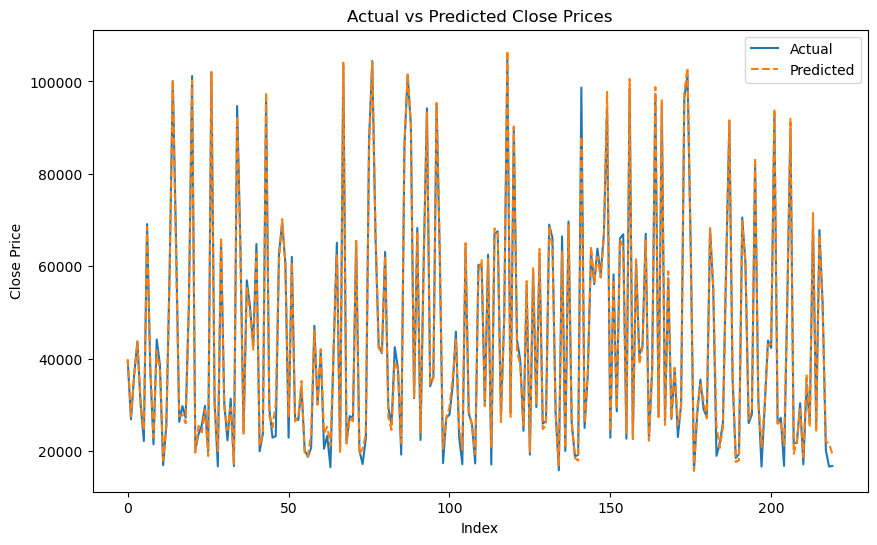

Test RMSE: 1817.752857491481


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 데이터 불러오기 (예시로 df라는 DataFrame에 데이터가 있다고 가정합니다)
# df = pd.read_csv('your_data.csv')

# 1. 날짜 데이터 처리 (날짜 컬럼이 'DATE'라고 가정)
df['DATE'] = pd.to_datetime(df['DATE'])  # 'DATE' 컬럼을 datetime 형식으로 변환

# 날짜에서 유용한 특성 추출
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day


# 'DATE' 컬럼은 더 이상 필요 없으므로 삭제
df = df.drop(columns=['DATE'])

# 2. 'CLOSE' 컬럼을 제외한 나머지 특성들을 사용
X = df.drop(columns=['CLOSE'])

# 'CLOSE' 컬럼을 목표 값으로 사용
y = df['CLOSE']

# 3. 데이터 전처리
# 데이터를 훈련 세트와 테스트 세트로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 딥러닝 모델 정의
model = Sequential()

# 입력층 (특성의 수에 맞춰 입력 크기 조정)
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# 숨겨진층 1
model.add(Dense(units=64, activation='relu'))

# 숨겨진층 2
model.add(Dense(units=32, activation='relu'))

# 출력층 (회귀 문제이므로 활성화 함수는 'linear')
model.add(Dense(units=1, activation='linear'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 5. 조기 종료 (EarlyStopping) 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 6. 모델 훈련
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping], verbose=1)

# 7. 모델 평가
train_loss = model.evaluate(X_train_scaled, y_train)
test_loss = model.evaluate(X_test_scaled, y_test)

print(f"Train Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# 8. 예측 결과
y_pred = model.predict(X_test_scaled)

# 9. 결과 시각화 (실제 값 vs 예측 값)
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 10. 추가적인 성능 평가 (RMSE 계산)
from sklearn.metrics import mean_squared_error
import math

# RMSE 계산
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 - 1s - 27ms/step - loss: 2592406016.0000
Epoch 2/20
28/28 - 0s - 2ms/step - loss: 2592340736.0000
Epoch 3/20
28/28 - 0s - 2ms/step - loss: 2592256768.0000
Epoch 4/20
28/28 - 0s - 2ms/step - loss: 2592156416.0000
Epoch 5/20
28/28 - 0s - 2ms/step - loss: 2592061696.0000
Epoch 6/20
28/28 - 0s - 1ms/step - loss: 2591966976.0000
Epoch 7/20
28/28 - 0s - 1ms/step - loss: 2591882240.0000
Epoch 8/20
28/28 - 0s - 1ms/step - loss: 2591790848.0000
Epoch 9/20
28/28 - 0s - 1ms/step - loss: 2591713536.0000
Epoch 10/20
28/28 - 0s - 1ms/step - loss: 2591646976.0000
Epoch 11/20
28/28 - 0s - 1ms/step - loss: 2591566592.0000
Epoch 12/20
28/28 - 0s - 1ms/step - loss: 2591497472.0000
Epoch 13/20
28/28 - 0s - 1ms/step - loss: 2591422976.0000
Epoch 14/20
28/28 - 0s - 1ms/step - loss: 2591358976.0000
Epoch 15/20
28/28 - 0s - 1ms/step - loss: 2591293696.0000
Epoch 16/20
28/28 - 0s - 1ms/step - loss: 2591215616.0000
Epoch 17/20
28/28 - 0s - 1ms/step - loss: 2591150592.0000
Epoch 18/20
28/28 - 0s - 1ms/step

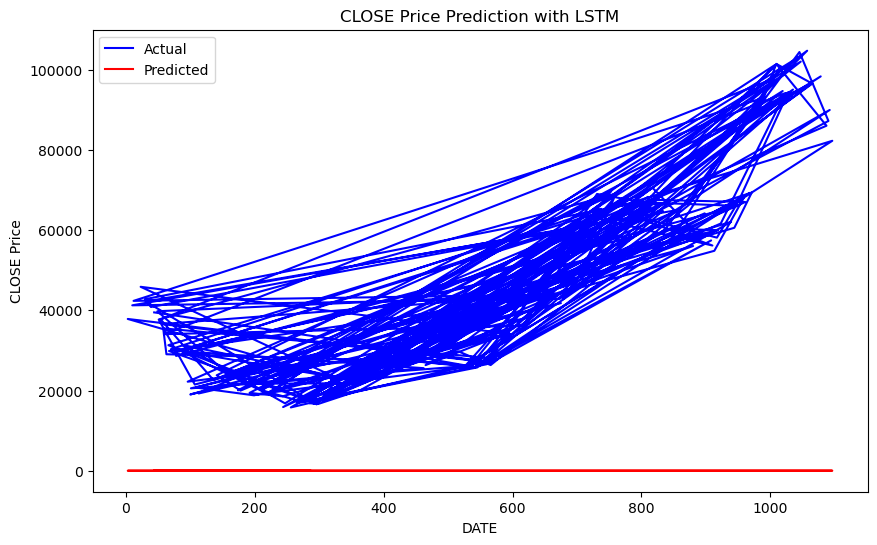

LSTM Test RMSE: 50843.02976672933


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# 데이터 로딩
# 여기서 df는 시계열 데이터 프레임이라고 가정합니다.
df = pd.read_csv('technical_data.csv')  # CSV 파일 불러오기 (필요

# 'Date' 열을 datetime 형식으로 변환
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE')

# 'CLOSE' 열을 예측하고자 하므로 해당 열을 y로 설정
y = df['CLOSE']

# 'CLOSE'를 제외한 나머지 열들을 X로 설정
X = df.drop(['CLOSE', 'DATE'], axis=1)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LSTM 모델은 (샘플 수, 타임스텝 수, 특성 수) 형태의 입력을 요구
# 데이터 차원 변경: (샘플 수, 1, 특성 수)로 변경
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# 학습 데이터와 테스트 데이터로 분리 (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LSTM 모델 정의
model = Sequential()

# LSTM 레이어 추가 (입력 차원: (1, 특성 수))
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# 출력 레이어 (회귀 문제이므로 Dense 출력)
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred, color='red', label='Predicted')
plt.title('CLOSE Price Prediction with LSTM')
plt.xlabel('DATE')
plt.ylabel('CLOSE Price')
plt.legend()
plt.show()

# 모델 성능 평가 (RMSE 계산)
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'LSTM Test RMSE: {rmse}')


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기 (날짜를 인덱스로 설정)
df = pd.read_csv('technical_data.csv', parse_dates=['DATE'], index_col='DATE')

# 데이터 전처리
scaler = MinMaxScaler()
df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']] = scaler.fit_transform(df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']])

# 훈련 및 테스트 데이터 분리
X = df[['OPEN', 'HIGH', 'LOW', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']]
y = df['CLOSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# from statsmodels.tsa.arima.model import ARIMA

# # 롤링 예측 수행
# history = list(y_train)  # 학습 데이터 리스트
# predictions = []  # 예측 값 저장

# for t in range(len(y_test)):
#     model = ARIMA(history, order=(5,1,1))  # (p,d,q) 조정 가능
#     model_fit = model.fit()
#     yhat = model_fit.forecast()[0]  # 한 스텝 예측
#     predictions.append(yhat)  # 예측 값 저장
#     history.append(y_test.iloc[t])  # 실제 값 추가하여 업데이트

# # 결과를 Series로 변환
# arima_pred = pd.Series(predictions, index=y_test.index)

In [115]:
# arima_pred

In [116]:
y_test = y_test.sort_index()
# arima_pred = pd.Series(arima_pred.values, index=y_test.index)

In [117]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))

# # 실제값 (파란색)
# plt.plot(y_test.index, y_test, label='Actual', color='blue')

# # 예측값 (빨간색) - 시리즈로 변환된 상태여야 함
# plt.plot(y_test.index, arima_pred, label='Predicted', color='red')

# # 그래프 제목 및 레이블 설정
# plt.title('Actual vs Predicted ARIMA Forecast')
# plt.xlabel('Date')
# plt.ylabel('Price')

# # 범례 추가
# plt.legend()

# # 그래프 출력
# plt.show()

In [118]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(y_train)
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 데이터 reshape
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# LSTM 모델 생성 및 훈련
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

# 예측 수행
lstm_pred = lstm_model.predict(X_test).flatten()

Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



28/28 - 1s - 36ms/step - loss: 0.0685
Epoch 2/200
28/28 - 0s - 4ms/step - loss: 0.0101
Epoch 3/200
28/28 - 0s - 4ms/step - loss: 0.0036
Epoch 4/200
28/28 - 0s - 4ms/step - loss: 0.0021
Epoch 5/200
28/28 - 0s - 4ms/step - loss: 0.0017
Epoch 6/200
28/28 - 0s - 4ms/step - loss: 0.0015
Epoch 7/200
28/28 - 0s - 4ms/step - loss: 0.0013
Epoch 8/200
28/28 - 0s - 4ms/step - loss: 0.0012
Epoch 9/200
28/28 - 0s - 4ms/step - loss: 0.0012
Epoch 10/200
28/28 - 0s - 4ms/step - loss: 0.0012
Epoch 11/200
28/28 - 0s - 4ms/step - loss: 0.0011
Epoch 12/200
28/28 - 0s - 6ms/step - loss: 0.0011
Epoch 13/200
28/28 - 0s - 4ms/step - loss: 0.0011
Epoch 14/200
28/28 - 0s - 4ms/step - loss: 0.0011
Epoch 15/200
28/28 - 0s - 4ms/step - loss: 0.0010
Epoch 16/200
28/28 - 0s - 4ms/step - loss: 0.0011
Epoch 17/200
28/28 - 0s - 4ms/step - loss: 9.9514e-04
Epoch 18/200
28/28 - 0s - 4ms/step - loss: 0.0013
Epoch 19/200
28/28 - 0s - 4ms/step - loss: 9.7286e-04
Epoch 20/200
28/28 - 0s - 4ms/step - loss: 0.0013
Epoch 21/200

In [121]:
import plotly.graph_objects as go

# Plotly로 시각화
fig = go.Figure()

# 실제값 (y_test)와 예측값 (lstm_pred) 시각화
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=y_test.index, y=lstm_pred, mode='lines', name='Predicted', line=dict(color='red')))

# 레이아웃 설정
fig.update_layout(
    title='Actual vs Predicted Bitcoin Price',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark',  # 배경 색상 조정
    xaxis_rangeslider_visible=True,  # x축에 범위 슬라이더 표시
    xaxis_tickangle=-45,  # 날짜 레이블 회전
    width=800,  # 그래프 가로 크기 (px)
    height=600  # 그래프 세로 크기 (px)
)

# 그래프 표시
fig.show()

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



28/28 - 1s - 23ms/step - loss: 0.0452
Epoch 2/100
28/28 - 0s - 2ms/step - loss: 0.0042
Epoch 3/100
28/28 - 0s - 2ms/step - loss: 6.1341e-04
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 3.3189e-04
Epoch 5/100
28/28 - 0s - 1ms/step - loss: 2.7599e-04
Epoch 6/100
28/28 - 0s - 1ms/step - loss: 2.3537e-04
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 2.0027e-04
Epoch 8/100
28/28 - 0s - 1ms/step - loss: 1.7118e-04
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 1.4757e-04
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 1.2618e-04
Epoch 11/100
28/28 - 0s - 1ms/step - loss: 1.1042e-04
Epoch 12/100
28/28 - 0s - 1ms/step - loss: 9.8428e-05
Epoch 13/100
28/28 - 0s - 1ms/step - loss: 8.9585e-05
Epoch 14/100
28/28 - 0s - 1ms/step - loss: 8.2496e-05
Epoch 15/100
28/28 - 0s - 1ms/step - loss: 7.5294e-05
Epoch 16/100
28/28 - 0s - 1ms/step - loss: 7.0145e-05
Epoch 17/100
28/28 - 0s - 3ms/step - loss: 6.7826e-05
Epoch 18/100
28/28 - 0s - 1ms/step - loss: 6.0941e-05
Epoch 19/100
28/28 - 0s - 1ms/step - loss: 5.8416e-05
Ep

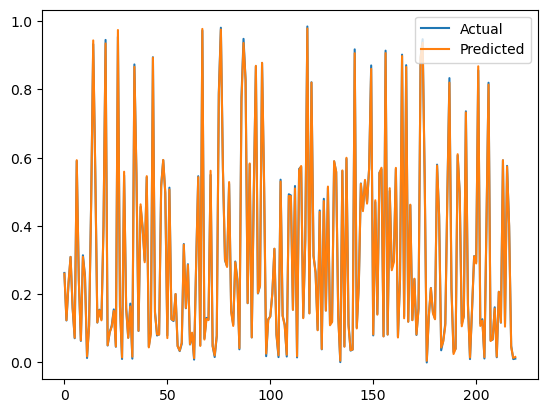

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터 불러오기 (날짜를 인덱스로 설정)
df = pd.read_csv('technical_data.csv', parse_dates=['DATE'], index_col='DATE')

# 데이터 전처리
scaler = MinMaxScaler()
df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']] = scaler.fit_transform(df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']])

# 훈련 및 테스트 데이터 분리
X = df[['OPEN', 'HIGH', 'LOW', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']]
y = df['CLOSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 reshape
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])
X_test = X_test.values.reshape(-1, 1, X_test.shape[1])

# LSTM 모델 생성 및 훈련
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train.values, epochs=100, batch_size=32, verbose=2)

# 예측 수행
y_pred_train = lstm_model.predict(X_train).flatten()
y_pred_test = lstm_model.predict(X_test).flatten()

# 성능 평가
train_mse = mean_squared_error(y_train.values, y_pred_train)
test_mse = mean_squared_error(y_test.values, y_pred_test)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

if train_mse < test_mse:
    print("Model might be overfitting.")

# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test, label='Predicted')
plt.legend()
plt.show()

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기 (날짜를 인덱스로 설정)
df = pd.read_csv('technical_data.csv', parse_dates=['DATE'], index_col='DATE')

# 데이터 전처리
scaler = MinMaxScaler()
df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']] = scaler.fit_transform(df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']])

# 상관관계 행렬 계산
corr_matrix = df.corr()

# 상관관계가 높은 피처 식별 및 제거
threshold = 0.8  # 상관관계 임계값 설정
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > threshold) and column != 'CLOSE']

# 상관관계가 높은 피처 제거
df = df.drop(to_drop, axis=1)

# 훈련 및 테스트 데이터 분리
X = df.drop('CLOSE', axis=1)
y = df['CLOSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 reshape
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])
X_test = X_test.values.reshape(-1, 1, X_test.shape[1])

In [134]:
# LSTM 모델 생성 및 훈련
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train.values, epochs=100, batch_size=32, verbose=2)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



28/28 - 1s - 29ms/step - loss: 0.1105
Epoch 2/100
28/28 - 0s - 2ms/step - loss: 0.0475
Epoch 3/100
28/28 - 0s - 2ms/step - loss: 0.0366
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 0.0269
Epoch 5/100
28/28 - 0s - 2ms/step - loss: 0.0186
Epoch 6/100
28/28 - 0s - 3ms/step - loss: 0.0125
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 0.0090
Epoch 8/100
28/28 - 0s - 2ms/step - loss: 0.0070
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 0.0056
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 0.0046
Epoch 11/100
28/28 - 0s - 3ms/step - loss: 0.0036
Epoch 12/100
28/28 - 0s - 1ms/step - loss: 0.0028
Epoch 13/100
28/28 - 0s - 1ms/step - loss: 0.0021
Epoch 14/100
28/28 - 0s - 1ms/step - loss: 0.0015
Epoch 15/100
28/28 - 0s - 1ms/step - loss: 0.0012
Epoch 16/100
28/28 - 0s - 1ms/step - loss: 8.7569e-04
Epoch 17/100
28/28 - 0s - 1ms/step - loss: 6.7448e-04
Epoch 18/100
28/28 - 0s - 1ms/step - loss: 5.6332e-04
Epoch 19/100
28/28 - 0s - 1ms/step - loss: 4.5017e-04
Epoch 20/100
28/28 - 0s - 1ms/step - loss: 3.9155e-04


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train MSE: 0.00013998700238753985
Test MSE: 0.00014413160461507074
Model might be overfitting.


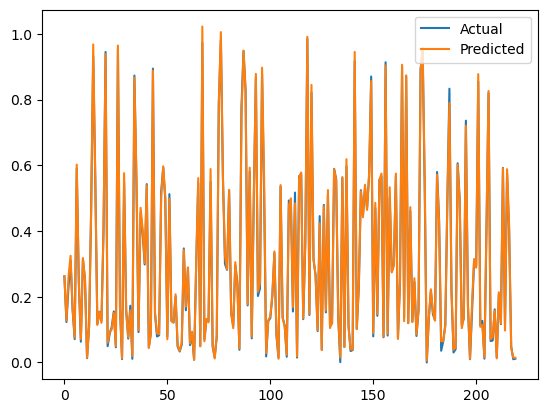

In [135]:
# 예측 수행
y_pred_train = lstm_model.predict(X_train).flatten()
y_pred_test = lstm_model.predict(X_test).flatten()

# 성능 평가
train_mse = mean_squared_error(y_train.values, y_pred_train)
test_mse = mean_squared_error(y_test.values, y_pred_test)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

if train_mse < test_mse:
    print("Model might be overfitting.")

# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test, label='Predicted')
plt.legend()
plt.show()

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
import random

# 재현성을 위해 난수 고정
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 데이터 불러오기 및 전처리
df = pd.read_csv('technical_data.csv', parse_dates=['DATE'], index_col='DATE')

# max, min 구하기
max_price = df['CLOSE'].max()
min_price = df['CLOSE'].min()

print(max_price, min_price)

scaler = MinMaxScaler()
df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']] = scaler.fit_transform(df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'SMA_14', 'RSI_14', 'BOLLINGER_UPPER', 'BOLLINGER_MIDDLE', 'BOLLINGER_LOWER', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'ATR', 'STDDEV', 'PIVOT', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'ENGULFING', 'DOJI', 'HAMMER', 'MORNINGSTAR', 'OBV']])

# 상관관계가 높은 피처 제거
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8) and column != 'CLOSE']
df = df.drop(to_drop, axis=1)

# 훈련 및 테스트 데이터 분리
X = df.drop('CLOSE', axis=1)
y = df['CLOSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터 reshape
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])
X_test = X_test.values.reshape(-1, 1, X_test.shape[1])

# 교차 검증을 위한 KFold 생성
kf = KFold(n_splits=5, shuffle=True)
mse_values = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.values[train_index], y_train.values[test_index]
    
    # 모델 생성 및 훈련
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
    model.add(Dropout(0.2))  # 드롭아웃 추가
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
    
    # 예측 및 성능 평가
    y_pred_fold = model.predict(X_test_fold).flatten()
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mse_values.append(mse)

print(f"Average MSE across folds: {np.mean(mse_values)}")

# 최종 모델 생성 및 훈련
final_model = Sequential()
final_model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
final_model.add(Dropout(0.2))
final_model.add(Dense(1))
final_model.compile(loss='mean_squared_error', optimizer='adam')
final_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# 예측 수행
y_pred_test = final_model.predict(X_test).flatten()

# 성능 평가
test_mse = mean_squared_error(y_test.values, y_pred_test)
print(f"Test MSE: {test_mse}")

# 마지막 날의 데이터를 기반으로 다음 날 CLOSE 예측
last_day_data = df.iloc[-1].drop('CLOSE').values.reshape(1, 1, -1)  # 마지막 날 데이터 준비

next_day_close_scaled = final_model.predict(last_day_data).flatten()[0]  # 스케일된 값 예측

# 스케일링 복원 (역변환)
next_day_close = next_day_close_scaled * (max_price - min_price) + min_price

print(f"Predicted CLOSE for the next day: {next_day_close}")

106146.265625 15787.2841796875


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Average MSE across folds: 0.00021834345807164064
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



28/28 - 1s - 26ms/step - loss: 0.1447
Epoch 2/100
28/28 - 0s - 2ms/step - loss: 0.0559
Epoch 3/100
28/28 - 0s - 2ms/step - loss: 0.0420
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 0.0321
Epoch 5/100
28/28 - 0s - 1ms/step - loss: 0.0247
Epoch 6/100
28/28 - 0s - 1ms/step - loss: 0.0183
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 0.0132
Epoch 8/100
28/28 - 0s - 1ms/step - loss: 0.0105
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 0.0090
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 0.0080
Epoch 11/100
28/28 - 0s - 1ms/step - loss: 0.0070
Epoch 12/100
28/28 - 0s - 2ms/step - loss: 0.0058
Epoch 13/100
28/28 - 0s - 1ms/step - loss: 0.0049
Epoch 14/100
28/28 - 0s - 2ms/step - loss: 0.0041
Epoch 15/100
28/28 - 0s - 2ms/step - loss: 0.0040
Epoch 16/100
28/28 - 0s - 2ms/step - loss: 0.0033
Epoch 17/100
28/28 - 0s - 1ms/step - loss: 0.0033
Epoch 18/100
28/28 - 0s - 1ms/step - loss: 0.0031
Epoch 19/100
28/28 - 0s - 1ms/step - loss: 0.0025
Epoch 20/100
28/28 - 0s - 1ms/step - loss: 0.0024
Epoch 21/100
28/28 -